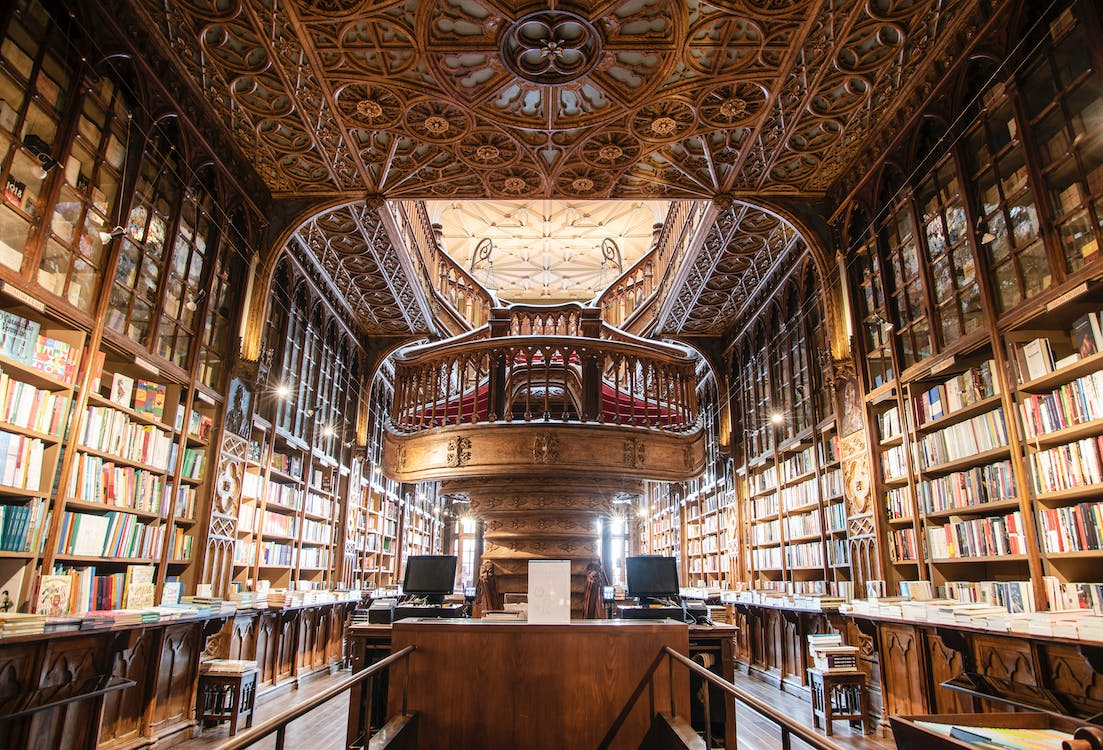

###  Dataset source : https://www.kaggle.com/code/preethiabraham/analysis-of-amazon-s-bestselling-novels/data

# 0 - Imports 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import pickle as pkl
import seaborn as sns

# 1. Load dataset

In [2]:
df = pd.read_csv('amazon-books.csv')
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,"Act Like a Lady, Think Like a Man: What Men Re...",Steve Harvey,4.6,5013,17,2009,Non Fiction
1,Arguing with Idiots: How to Stop Small Minds a...,Glenn Beck,4.6,798,5,2009,Non Fiction
2,"Breaking Dawn (The Twilight Saga, Book 4)",Stephenie Meyer,4.6,9769,13,2009,Fiction
3,Crazy Love: Overwhelmed by a Relentless God,Francis Chan,4.7,1542,14,2009,Non Fiction
4,Dead And Gone: A Sookie Stackhouse Novel (Sook...,Charlaine Harris,4.6,1541,4,2009,Fiction


# 2 - EDA (Exploratory Data Analysis)

## Statistics

In [3]:
df.info()
# This dataset is composed of 7 columns : "Name", "Author", "User Rating", "Reviews", "Price", "Year", "Genre"
# 700 rows.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         700 non-null    object 
 1   Author       700 non-null    object 
 2   User Rating  700 non-null    float64
 3   Reviews      700 non-null    int64  
 4   Price        700 non-null    int64  
 5   Year         700 non-null    int64  
 6   Genre        700 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 38.4+ KB


In [4]:
df.describe() #general statistics

# User Rating :
# Reviews :
# Price :

# In the next steps of the EDA, I will analyze every column.

,User Rating,Reviews,Price,Year
count,700.000000,700.000000,700.000000,700.000000
mean,4.639857,19255.195714,12.700000,2015.500000
std,0.218586,23613.443875,9.915162,4.034011
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4987.250000,7.000000,2012.000000
50%,4.700000,10284.000000,11.000000,2015.500000
75%,4.800000,23358.000000,15.000000,2019.000000
max,4.900000,208917.000000,105.000000,2022.000000


In [5]:
df.Name.nunique() # Here I check the number of distinct books In the dataset
#There are in fact 441 different Books in the dataset

441

In [6]:
df.Author.nunique() #Here I check the number of distinct Author In the dataset
#There are 305 different authors. We can assume that some books in the dataset were written by the same author

305

In [7]:
df.Year.unique() #Here I check the different years of the dataset. it goes from 2009 to 2022.

array([2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
       2020, 2021, 2022], dtype=int64)

In [8]:
df.Genre.unique() #We can notice that the books are classified by 'Non Fiction' and 'Fiction' genres.

array(['Non Fiction', 'Fiction'], dtype=object)

## Focus on Authors and books

In [9]:
df.Name.value_counts()
# Here I check the column "Name" to see if there are 700 different (distinct) books in this dataset
# We can notice that some books apear several times in the dataset 
#for exemple 'Publication Manual of the American Psychological Association, 6th Edition' appears 10 times
# it means that this bookhas been part of the best selling books from. Idem for "The Very Hungry Caterpillar"

Publication Manual of the American Psychological Association, 6th Edition                                               10
The Very Hungry Caterpillar                                                                                             10
StrengthsFinder 2.0                                                                                                      9
The Four Agreements: A Practical Guide to Personal Freedom (A Toltec Wisdom Book)                                        9
Oh, the Places You'll Go!                                                                                                8
                                                                                                                        ..
Soul Healing Miracles: Ancient and New Sacred Wisdom, Knowledge, and Practical Techniques for Healing the Spiritual…     1
Shred: The Revolutionary Diet: 6 Weeks 4 Inches 2 Sizes                                                                  1
Rush Revere and 

In [10]:
#Here I select every rows that contains "Publication Manual of the American Psychological Association, 6th Edition"

df[df['Name'] == 'Publication Manual of the American Psychological Association, 6th Edition'] 

# This subdataset confirms our last supposition : each row correspond to a different year's stats.

,Name,Author,User Rating,Reviews,Price,Year,Genre
22,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2009,Non Fiction
70,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2010,Non Fiction
120,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2011,Non Fiction
170,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2012,Non Fiction
225,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2013,Non Fiction
276,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2014,Non Fiction
329,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2015,Non Fiction
379,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2016,Non Fiction
425,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2017,Non Fiction
479,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2018,Non Fiction


In [11]:
#Other example for a double check:
df[df['Name'] == 'Oh, the Places You\'ll Go!']

# This book was a bestseller from 2012 to 2019.

,Name,Author,User Rating,Reviews,Price,Year,Genre
167,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2012,Fiction
223,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2013,Fiction
274,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2014,Fiction
327,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2015,Fiction
377,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2016,Fiction
421,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2017,Fiction
476,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2018,Fiction
523,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2019,Fiction


### 3 - Do we need Data Cleaning ?


In [12]:
df.isna().sum() # there is no missing values

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

In [13]:
df.duplicated().sum() #there is apparently no duplicates. No cleaning needed :)

0

# 4 - Data Visualization

### Book genre Analysis

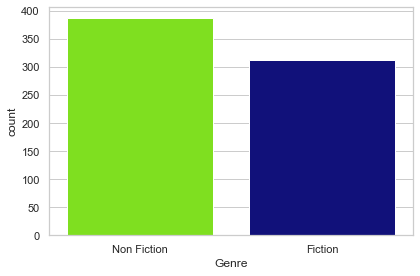

In [61]:
sns.set(style="whitegrid")
sns.countplot(x=df["Genre"],palette=['chartreuse', 'darkblue'])
plt.tight_layout()
plt.show()

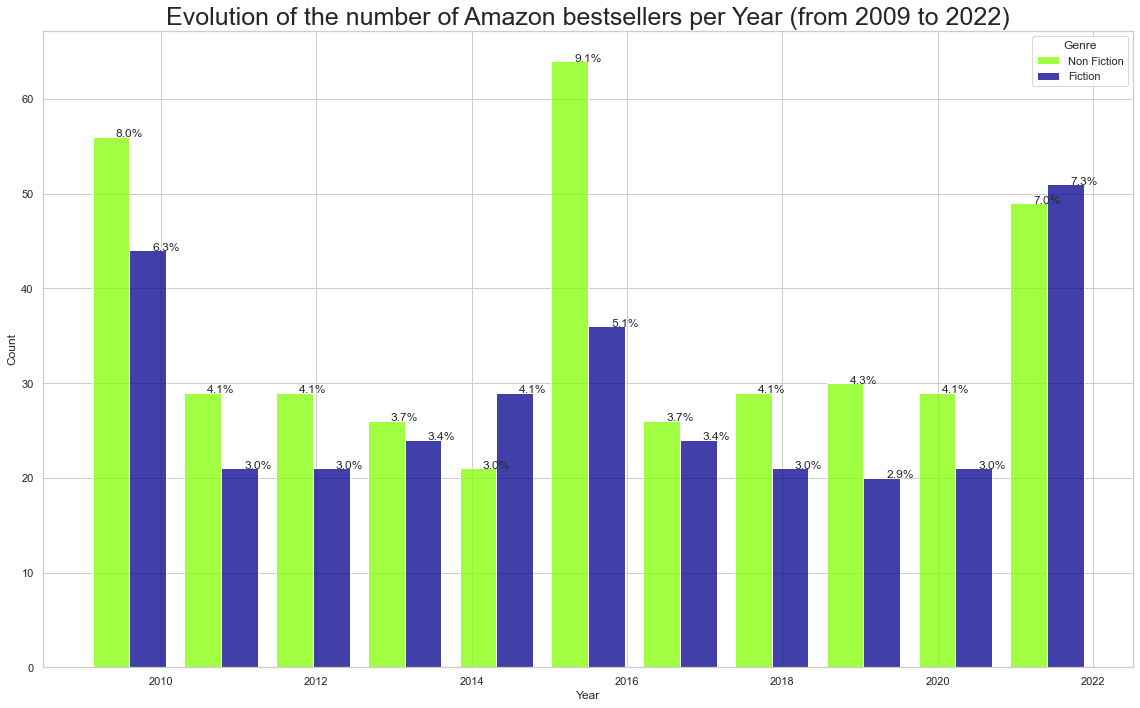

In [55]:
#evolution of the number of bestsellers per Year (histplot)

total = float(len(df))
plt.figure(figsize=(16, 10))
sns.set(style="whitegrid")
plt.title('Evolution of the number of Amazon bestsellers per Year (from 2009 to 2022)', fontsize=25)
ax = sns.histplot(df, x="Year", hue="Genre",palette=['chartreuse', 'darkblue'], multiple="dodge", shrink=.8)

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')

plt.tight_layout()
plt.show()

[Text(0.5, 1.0, 'User Rating by Genre from 2009-2022')]

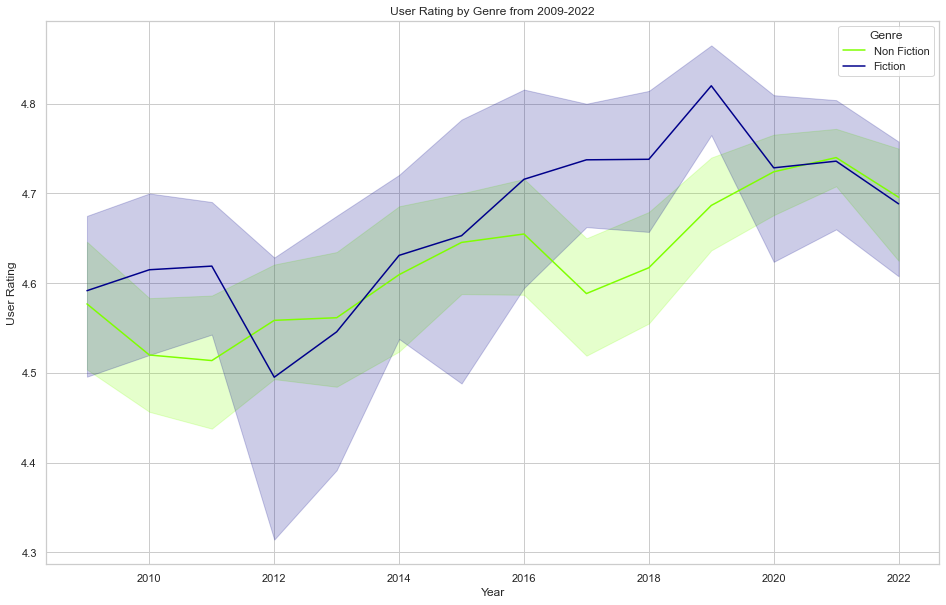

In [56]:
#evolution of the number of bestsellers per Year (lineplot)
plt.figure(figsize=(16, 10))
sns.lineplot(x=df.Year, y=df["User Rating"],hue="Genre",
             data=df, palette=['chartreuse', 'darkblue']).set(title='User Rating by Genre from 2009-2022')

### Evolution of the prices

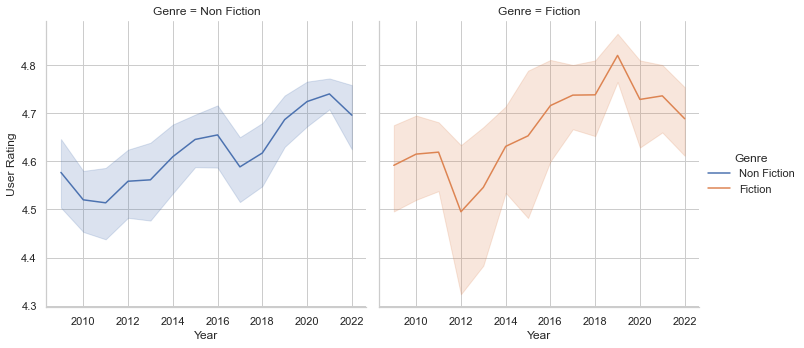

In [59]:
#Evolution of the prices 

sns.relplot(
    data=df, x="Year", y="User Rating", col="Genre",
    hue="Genre", kind="line")
